# Análisis de Opiniones en Redes Sociales sobre Hospitales Públicos en la Provincia de Manabí mediante Redes Neuronales Recurrentes y Aprendizaje Automático en Python.

- # Carreño Reyes Erick Roger
- # Navarrete Cevallos Luis David

## 1. Cargar y Preprocesar Conjunto de Datos (Opiniones en Redes Sociales)

## Librerias previas a instalar:

1. pip install tensorflow
2. pip install imblearn


Cargando datos...
Datos cargados: 2878 registros, 3 columnas
Columnas en el DataFrame:
Index(['username', 'timestamp', 'comment'], dtype='object')
Número de registros: 2878
Número de columnas: 3
Columnas en el DataFrame:
Index(['username', 'timestamp', 'comment'], dtype='object')

Primeras 10 filas del DataFrame:


,username,timestamp,comment
0,@MarcoGilerM,2023-09-11T13:37:46.000Z,eso no es todo al realizarse la transferencia ...
1,@JoseAnt40060050,2023-09-01T22:39:33.000Z,nunca entregaste un hospital para la zona sur ...
2,@MariaMa99904828,2023-05-31T00:22:19.000Z,a mas de adefesio sinverguenza charlatan cuand...
3,@patsurfer71,2023-03-30T12:27:34.000Z,jipijapa necesita un hospital general que pued...
4,@Joselui48173725,2023-02-01T13:43:37.000Z,hay jente que tienen caca en el serebropor k v...
5,@juancasaenz76,2023-01-31T18:21:38.000Z,x ej los dos funcionarios atacados a bala en p...
6,@radialvision,2023-01-30T20:57:29.000Z,noticias se trataria de la jueza genny guanol...
7,@mmendozabelen,2023-01-30T19:11:53.000Z,se trataria de la jueza genny guanoluisa delga...
8,@HRZManta,2022-07-08T20:08:41.000Z,este tipo de cirugias se realizan de forma pro...
9,@HRZManta,2022-06-13T16:33:54.000Z,esta unidad mantiene 1096 casos vinculados des...



Estadísticas descriptivas del DataFrame:


,username,timestamp,comment
count,2878,2878,2878
unique,1306,2874,2867
top,@Salud_CZ4,2022-12-15T15:15:06.000Z,peperuales excelente ministro soy especialist...
freq,240,2,3


Columna 'sentimiento' creada a partir de los comentarios.
Limpiando datos...
Columnas disponibles después de limpiar los datos: Index(['username', 'timestamp', 'comment', 'sentimiento', 'comment_limpio',
       'tokens'],
      dtype='object')


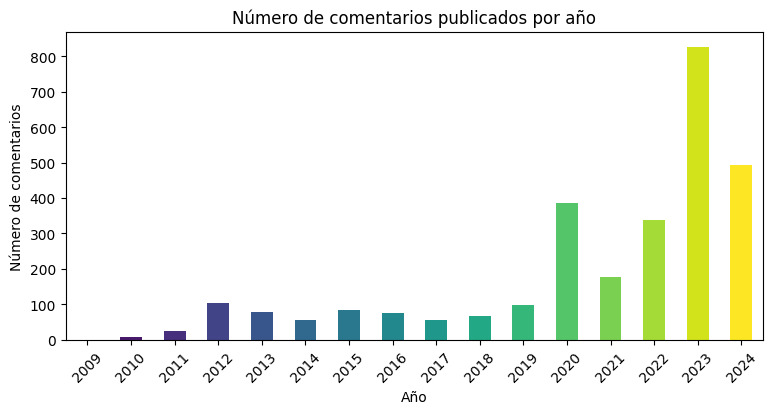

In [1]:
#!pip install tensorflow
# Sección 1: Cargar y Limpiar Datos
import pandas as pd
import numpy as np
import re 
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import display

# Función para limpiar texto
def limpiar_texto(text):
    text = text.lower()
    text = re.sub(r"[{}]".format(string.punctuation), "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Función para tokenizar texto
def tokenizar_texto(text):
    return text.split()

# Función para visualizar datos
def visualizar_datos(df):
    # Mostrar estadísticas básicas de los datos
    print(f"Número de registros: {df.shape[0]}")
    print(f"Número de columnas: {df.shape[1]}")
    print(f"Columnas en el DataFrame:\n{df.columns}")
    
    # Mostrar las primeras 10 filas del DataFrame en formato de tabla
    print("\nPrimeras 10 filas del DataFrame:")
    display(df.head(10))
    
    # Mostrar estadísticas descriptivas del DataFrame
    print("\nEstadísticas descriptivas del DataFrame:")
    display(df.describe(include='all'))

# Función para visualizar la distribución temporal de los comentarios por año
def visualizar_distribucion_temporal_anual(df):
    df['timestamp'] = pd.to_datetime(df['timestamp']).dt.tz_localize(None)
    df['year'] = df['timestamp'].dt.year
    df_yearly = df.groupby('year').size()
    
    # Crear una paleta de colores
    colores = plt.cm.viridis(np.linspace(0, 1, len(df_yearly)))

    fig, ax = plt.subplots(figsize=(9, 4))
    df_yearly.plot(kind='bar', color=colores, ax=ax)

    ax.set_title('Número de comentarios publicados por año')
    ax.set_xlabel('Año')
    ax.set_ylabel('Número de comentarios')
    plt.xticks(rotation=45)
    plt.show()

# Cargar datos
print("Cargando datos...")
df = pd.read_csv('datasets/datos_combinados_1.csv')
print(f"Datos cargados: {df.shape[0]} registros, {df.shape[1]} columnas")
print(f"Columnas en el DataFrame:\n{df.columns}")

# Visualizar datos
visualizar_datos(df)

# Verificar si la columna 'sentimiento' existe
if 'sentimiento' not in df.columns:
    def extraer_sentimiento(comment):
        positive_terms = ['bueno', 'excelente', 'feliz', 'positivo']
        negative_terms = ['malo', 'horrible', 'triste', 'negativo']
        
        for term in positive_terms:
            if term in comment:
                return 'positivo'
        for term in negative_terms:
            if term in comment:
                return 'negativo'
        return 'neutral'
    
    df['sentimiento'] = df['comment'].apply(extraer_sentimiento)
    print("Columna 'sentimiento' creada a partir de los comentarios.")
else:
    print("Columna 'sentimiento' ya existe en el DataFrame.")

# Limpieza de datos
print("Limpiando datos...")
df['comment_limpio'] = df['comment'].apply(limpiar_texto)
df['tokens'] = df['comment_limpio'].apply(tokenizar_texto)
print(f"Columnas disponibles después de limpiar los datos: {df.columns}")

# Visualizar la distribución temporal de los comentarios por año
visualizar_distribucion_temporal_anual(df)

# SECCION 1.5. Análisis Exploratorio.

[nltk_data] Downloading package stopwords to C:\Users\Erick
[nltk_data]     Carreño\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Algunas stopwords en español: ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']
Palabras más frecuentes por año (sin stopwords):

Año 2009:
[('1', 1), ('3', 1), ('calceta', 1), ('casi', 1), ('curva', 1), ('diagramada', 1), ('empate', 1), ('falta', 1), ('hospital', 1), ('info', 1)]

Año 2010:
[('hospital', 9), ('calceta', 6), ('manabi', 3), ('campo', 2), ('d', 2), ('llevarme', 2), ('si', 2), ('3', 1), ('4', 1), ('acevedo', 1)]

Año 2011:
[('hospital', 27), ('calceta', 8), ('pajan', 6), ('d', 5), ('manabi', 5), ('q', 5), ('alfaro', 4), ('director', 4), ('flavio', 4), ('ajungbluth', 3)]

Año 2012:
[('hospital', 104), ('flavio', 26), ('alfaro', 25), ('rocafuerte', 24), ('mashirafael', 20), ('pajan', 16), ('basico', 14), ('d', 14), ('director', 14), ('presidente', 14)]

Año 2013:
[('hospital', 78), ('calceta', 24), ('rocafuerte', 22), ('carmen', 12), ('manabi', 12), ('mashirafael', 11), ('q', 11), ('d', 10), ('0034635808439', 7), ('buscamos', 7)]

Año 2014:
[('hospital', 55), ('

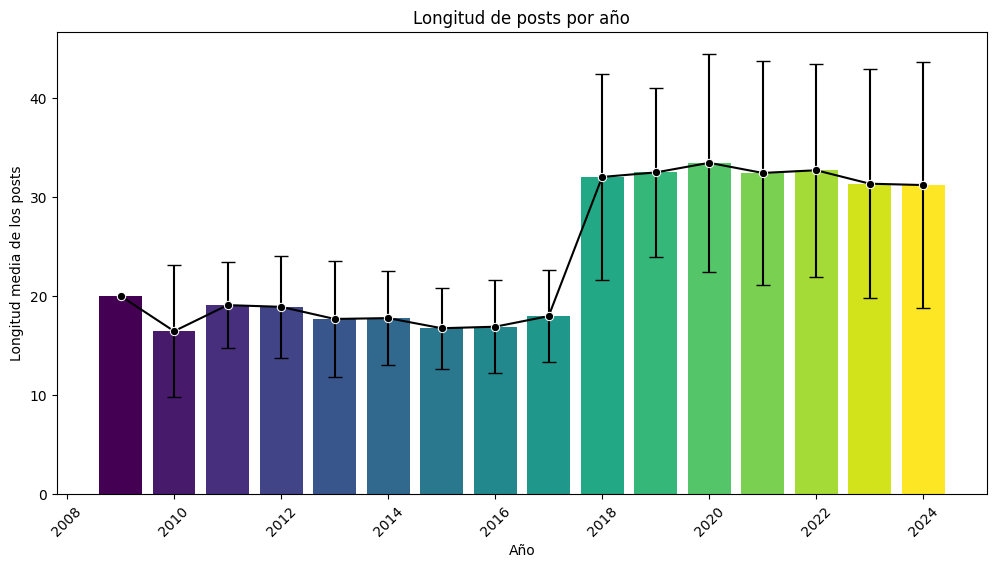

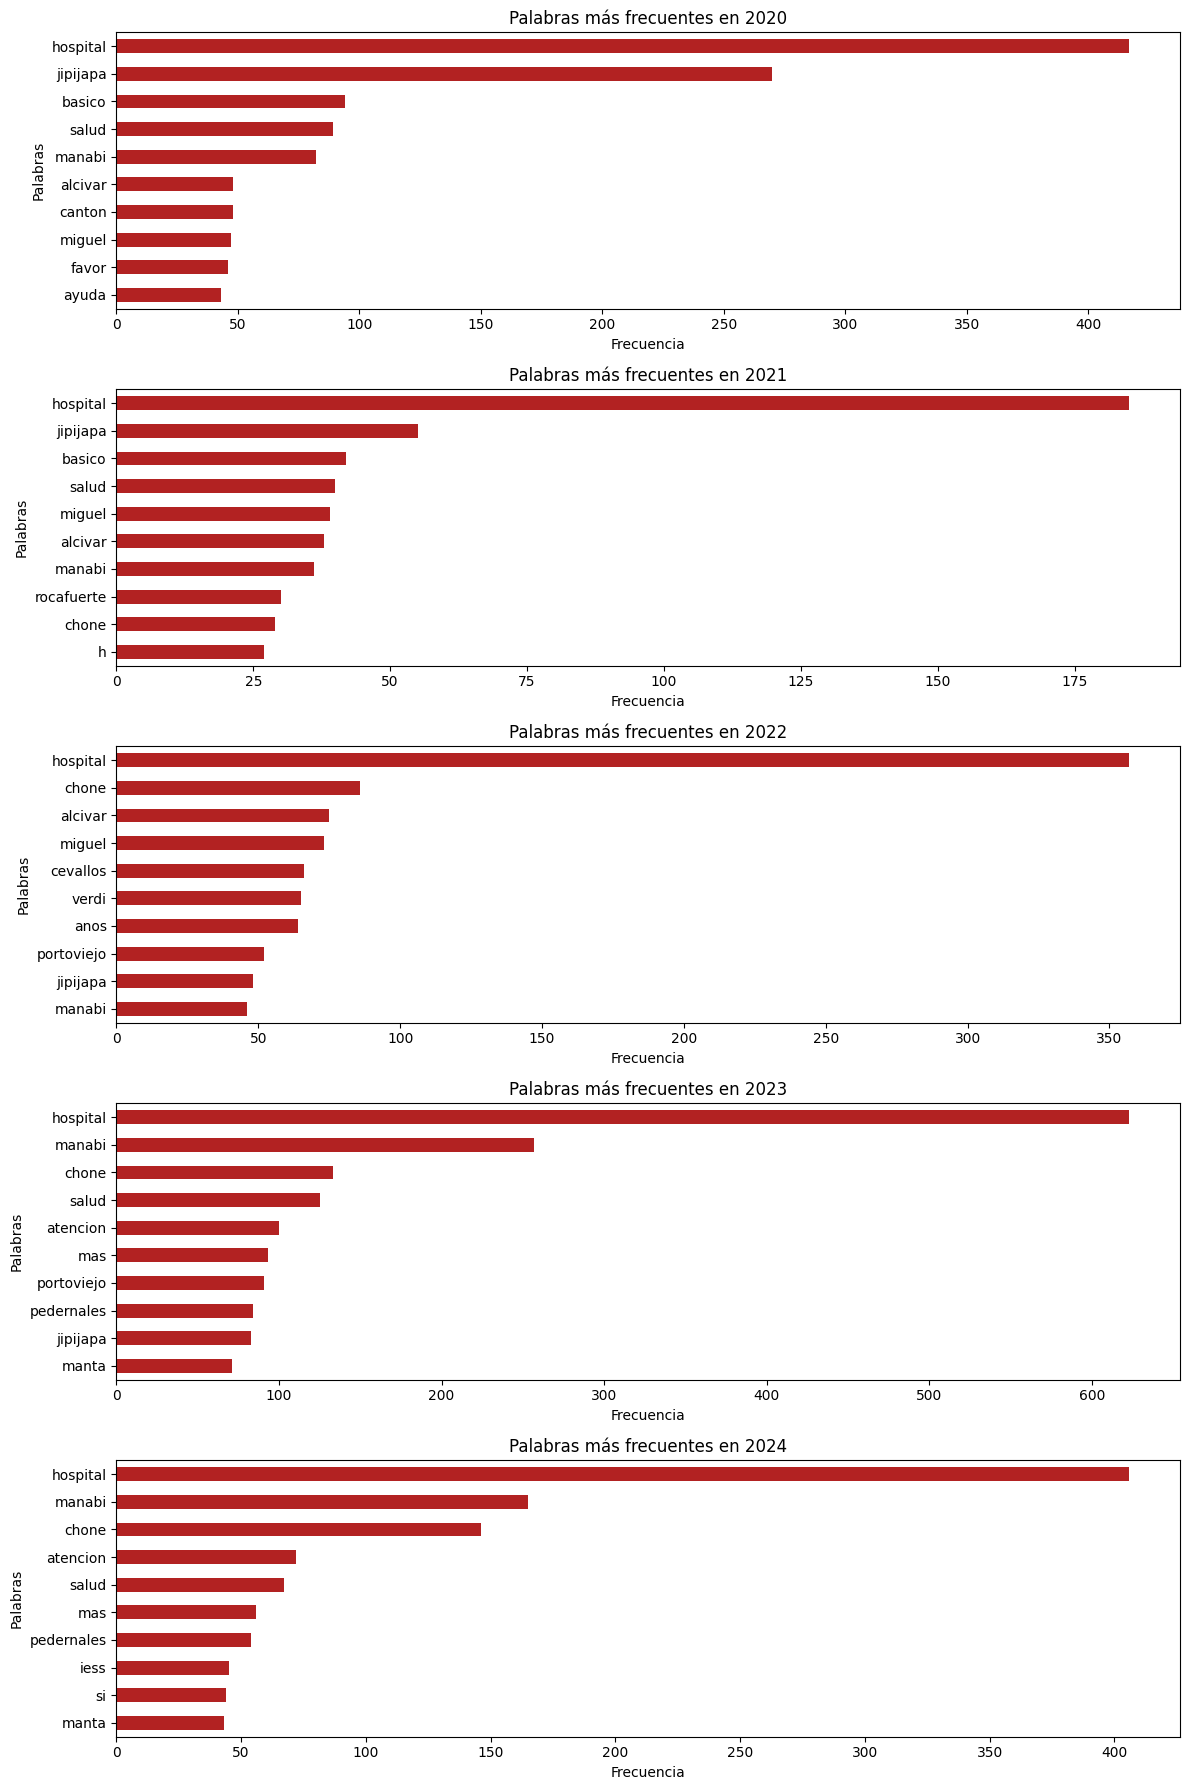

In [2]:
# Sección 1.5: Análisis Exploratorio
import json
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk

# Descargar stopwords de nltk
nltk.download('stopwords')

# Obtener listado de stopwords en español
stop_words = list(stopwords.words('spanish'))
# Añadir stopwords adicionales si es necesario
stop_words.extend(["amp", "xa", "xe"])
print("Algunas stopwords en español:", stop_words[:10])

# Función para análisis exploratorio y guardar diccionario de palabras
def analisis_exploratorio(df):
    # Expandir la columna 'tokens'
    df_tidy = df.explode(column='tokens')
    
    # Filtrar para excluir stopwords
    df_tidy = df_tidy[~df_tidy["tokens"].isin(stop_words)]
    
    # Mapear palabras más frecuentes por año
    df_tidy['year'] = df_tidy['timestamp'].dt.year
    word_freq_by_year = df_tidy.groupby(['year', 'tokens']).size().reset_index(name='counts')
    
    # Crear un diccionario de palabras frecuentes por año
    word_dict = {}
    for year in word_freq_by_year['year'].unique():
        year_data = word_freq_by_year[word_freq_by_year['year'] == year]
        word_dict[str(year)] = dict(zip(year_data['tokens'], year_data['counts']))
    
    # Guardar diccionario en un archivo JSON
    with open('word_dict.json', 'w') as json_file:
        json.dump(word_dict, json_file)
    
    # Mostrar palabras más frecuentes por año
    print("Palabras más frecuentes por año (sin stopwords):")
    for year in word_dict:
        print(f"\nAño {year}:")
        print(sorted(word_dict[year].items(), key=lambda item: item[1], reverse=True)[:10])
    
    return df_tidy

# Realizar análisis exploratorio y guardar diccionario de palabras
df_tidy = analisis_exploratorio(df)

# Longitud media y desviación de los comentarios por año
df['comment_length'] = df['comment'].apply(lambda x: len(x.split()))
length_stats_by_year = df.groupby('year')['comment_length'].agg(['mean', 'std'])
print("\nLongitud media y desviación de los comentarios por año:")
print(length_stats_by_year)

# Crear gráfico de barras para la longitud media de los comentarios por año con barras de error
fig, ax = plt.subplots(figsize=(12, 6))
colores = plt.cm.viridis(np.linspace(0, 1, len(length_stats_by_year)))

# Gráfico de barras con barras de error
ax.bar(length_stats_by_year.index, length_stats_by_year['mean'], yerr=length_stats_by_year['std'], color=colores, capsize=5)

# Línea de tendencia de la longitud media
sns.lineplot(x=length_stats_by_year.index, y=length_stats_by_year['mean'], marker='o', ax=ax, color='black')

ax.set_title('Longitud de posts por año')
ax.set_xlabel('Año')
ax.set_ylabel('Longitud media de los posts')
plt.xticks(rotation=45)
plt.show()

# Visualización de las palabras más frecuentes por año para los últimos 5 años (2020-2024)
years_to_plot = [2020, 2021, 2022, 2023, 2024]

fig, axs = plt.subplots(nrows=len(years_to_plot), ncols=1, figsize=(12, 18))
for i, year in enumerate(years_to_plot):
    year_data = df_tidy[df_tidy['year'] == year]
    word_counts = year_data['tokens'].value_counts().head(10)
    word_counts.plot(kind='barh', ax=axs[i], color='firebrick')
    axs[i].invert_yaxis()
    axs[i].set_title(f'Palabras más frecuentes en {year}')
    axs[i].set_xlabel('Frecuencia')
    axs[i].set_ylabel('Palabras')

fig.tight_layout()
plt.show()

# Tokenización y Padding
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['comment_limpio'])
sequences = tokenizer.texts_to_sequences(df['comment_limpio'])
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=max_len)

# Mapeo de etiquetas de las 3 emociones básicas
sentimiento_mapping = {'positivo': 2, 'neutral': 1, 'negativo': 0}
df['sentimiento_mapeado'] = df['sentimiento'].map(sentimiento_mapping)

# Convertir las etiquetas a formato categórico
labels = to_categorical(df['sentimiento_mapeado'])

# Seccion 1.5.1 División de Datos y Balanceo del Conjunto de Entrenamiento.

In [3]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import numpy as np

# División de datos en entrenamiento, validación y prueba con estratificación
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de validación: {X_val.shape}")
print(f"Datos de prueba: {X_test.shape}")

# Verificar la distribución de clases en el conjunto de entrenamiento
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
class_distribution = dict(zip(unique, counts))
print(f"Distribución de clases antes de SMOTE: {class_distribution}")

# Determinar el número mínimo de muestras en las clases minoritarias
min_samples = min(class_distribution.values())

# Aplicar SMOTE al conjunto de datos de entrenamiento
print("Aplicando SMOTE para balanceo de clases...")
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=min(min_samples-1, 5))
X_train_smote, y_train_smote = smote.fit_resample(X_train, np.argmax(y_train, axis=1))

# Verificar el balance de clases después de SMOTE
unique, counts = np.unique(y_train_smote, return_counts=True)
print(f"Distribución de clases después de SMOTE: {dict(zip(unique, counts))}")

Datos de entrenamiento: (2014, 100)
Datos de validación: (432, 100)
Datos de prueba: (432, 100)
Distribución de clases antes de SMOTE: {0: 3, 1: 1957, 2: 54}
Aplicando SMOTE para balanceo de clases...
Distribución de clases después de SMOTE: {0: 1957, 1: 1957, 2: 1957}


# Sección 2: Análisis de Sentimientos con un enfoque lexico.

Primeros 5 términos del lexicón de sentimientos:
    palabra  puntuacion
0     culpa          -2
1    culpar          -2
2    aborda           1
3    abordo           1
4  abandona          -2
Ejemplos de comentarios con sus sentimientos calculados:
                                             comment  sentimiento_calculado
0  eso no es todo al realizarse la transferencia ...                     -2
1  nunca entregaste un hospital para la zona sur ...                      0
2  a mas de adefesio sinverguenza charlatan cuand...                     -1
3  jipijapa necesita un hospital general que pued...                      0
4  hay jente que tienen caca en el serebropor k v...                     -1
Ejemplos de comentarios con sus sentimientos sumados:
                                      username           timestamp  \
0  @ EnContraDeCorruptosDestructoresDeLaPatria 2024-02-28 14:16:20   
1                                   @1120nando 2020-05-06 21:38:28   
2                             

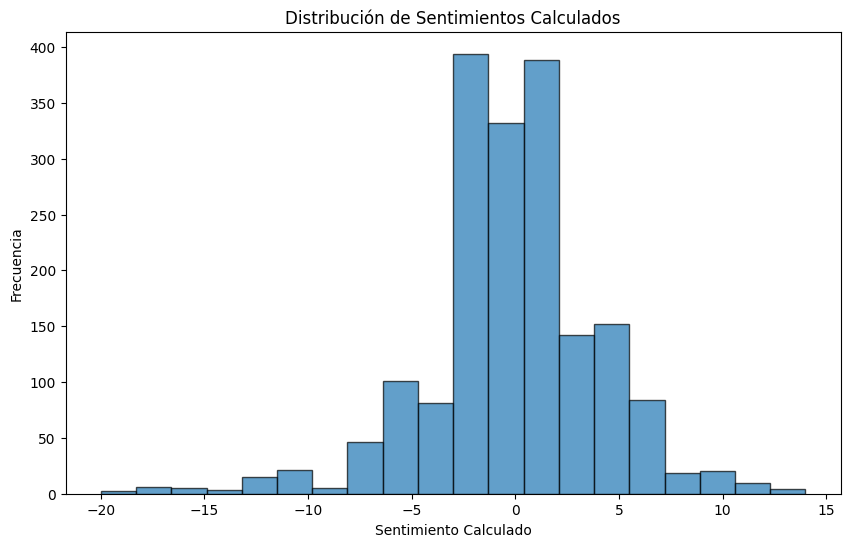

Perfil de Sentimientos de los Comentarios:
Positivos: 44.75%
Neutros  : 4.15%
Negativos: 51.09%


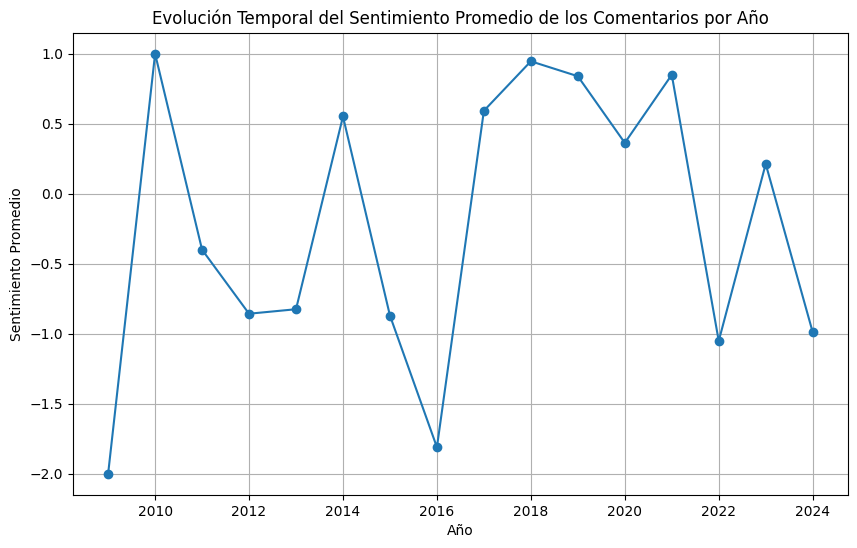

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

# Cargar el lexicón de sentimientos AFINN ajustado
lexicon_path = 'lexico_afinn.csv'
lexicon = pd.read_csv(lexicon_path, usecols=['palabra', 'puntuacion'])
print("Primeros 5 términos del lexicón de sentimientos:")
print(lexicon.head())

# Crear un diccionario a partir del lexicón para acceso rápido
lexicon_dict = dict(zip(lexicon['palabra'], lexicon['puntuacion']))

# Función para limpiar y tokenizar el texto
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    '''
    # Convertir todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[{}]'.format(re.escape(string.punctuation))
    nuevo_texto = re.sub(regex, ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split()
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return nuevo_texto

# Función para calcular el sentimiento de un texto
def calcular_sentimiento(texto):
    tokens = limpiar_tokenizar(texto)
    sentimiento = sum([lexicon_dict.get(token, 0) for token in tokens])
    return sentimiento

# Aplicar la función de sentimiento a los comentarios
df['sentimiento_calculado'] = df['comment_limpio'].apply(calcular_sentimiento)

# Mostrar algunos ejemplos de los comentarios con sus sentimientos calculados
print("Ejemplos de comentarios con sus sentimientos calculados:")
print(df[['comment', 'sentimiento_calculado']].head())

# Crear un DataFrame tidy para los comentarios y sus tokens
df_tidy = df.explode('tokens')

# Sentimiento promedio de cada comentario
tweets_sentimientos = pd.merge(
    left=df_tidy,
    right=lexicon,
    left_on="tokens", 
    right_on="palabra",
    how="inner"
)

tweets_sentimientos = tweets_sentimientos.drop(columns="palabra")

# Se suman los sentimientos de las palabras que forman cada comentario.
tweets_sentimientos = tweets_sentimientos[["username", "timestamp", "comment", "puntuacion"]] \
                      .groupby(["username", "timestamp", "comment"]) \
                      .sum().reset_index()

# Mostrar algunos ejemplos de los comentarios con sus sentimientos sumados
print("Ejemplos de comentarios con sus sentimientos sumados:")
print(tweets_sentimientos.head())

# Visualización de la distribución de sentimientos
plt.figure(figsize=(10, 6))
plt.hist(tweets_sentimientos['puntuacion'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Sentimientos Calculados')
plt.xlabel('Sentimiento Calculado')
plt.ylabel('Frecuencia')
plt.show()

# Calcular porcentajes de comentarios positivos, negativos y neutros
def perfil_sentimientos(df):
    positivos = round(100 * np.mean(df['puntuacion'] > 0), 2)
    neutros = round(100 * np.mean(df['puntuacion'] == 0), 2)
    negativos = round(100 * np.mean(df['puntuacion'] < 0), 2)
    print(f"Positivos: {positivos}%")
    print(f"Neutros  : {neutros}%")
    print(f"Negativos: {negativos}%")

print("Perfil de Sentimientos de los Comentarios:")
perfil_sentimientos(tweets_sentimientos)

# Convertir la columna 'timestamp' a formato de fecha
tweets_sentimientos['timestamp'] = pd.to_datetime(tweets_sentimientos['timestamp'])

# Agrupar por año y calcular el sentimiento promedio
tweets_sentimientos['year'] = tweets_sentimientos['timestamp'].dt.year
sentimientos_anuales = tweets_sentimientos.groupby('year')['puntuacion'].mean()

# Visualización de la evolución temporal del sentimiento promedio por año
plt.figure(figsize=(10, 6))
plt.plot(sentimientos_anuales.index, sentimientos_anuales.values, marker='o', linestyle='-')
plt.title('Evolución Temporal del Sentimiento Promedio de los Comentarios por Año')
plt.xlabel('Año')
plt.ylabel('Sentimiento Promedio')
plt.grid(True)
plt.show()

# Sección 3: Definición y Entrenamiento del Modelo LSTM.

In [5]:
'''
#import numpy as np
import pickle

# Definir parámetros
max_words = 10000
embedding_dim = 300
fasttext_path = 'cc.es.300.vec'
reduced_embedding_path = 'reduced_cc.es.300.vec'

# Tokenizar y preparar los datos
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['comment_limpio'])
sequences = tokenizer.texts_to_sequences(df['comment_limpio'])
text_data = pad_sequences(sequences, maxlen=max_len)

# Crear un conjunto de palabras del corpus
word_index = tokenizer.word_index
words_in_corpus = set(word_index.keys())

# Cargar embeddings preentrenados (FastText) solo para las palabras en el corpus
embedding_index = {}
with open(fasttext_path, encoding='utf-8') as f:
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        if word in words_in_corpus:
            coefs = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = coefs

# Crear matriz de embeddings reducida
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Guardar la matriz de embeddings en un archivo binario
with open(reduced_embedding_path, 'wb') as f:
    pickle.dump(embedding_matrix, f)

print("Embeddings procesados y guardados en 'reduced_cc.es.300.vec'")
'''

'\n#import numpy as np\nimport pickle\n\n# Definir parámetros\nmax_words = 10000\nembedding_dim = 300\nfasttext_path = \'cc.es.300.vec\'\nreduced_embedding_path = \'reduced_cc.es.300.vec\'\n\n# Tokenizar y preparar los datos\ntokenizer = Tokenizer(num_words=max_words)\ntokenizer.fit_on_texts(df[\'comment_limpio\'])\nsequences = tokenizer.texts_to_sequences(df[\'comment_limpio\'])\ntext_data = pad_sequences(sequences, maxlen=max_len)\n\n# Crear un conjunto de palabras del corpus\nword_index = tokenizer.word_index\nwords_in_corpus = set(word_index.keys())\n\n# Cargar embeddings preentrenados (FastText) solo para las palabras en el corpus\nembedding_index = {}\nwith open(fasttext_path, encoding=\'utf-8\') as f:\n    for line in f:\n        values = line.rstrip().split(\' \')\n        word = values[0]\n        if word in words_in_corpus:\n            coefs = np.asarray(values[1:], dtype=\'float32\')\n            embedding_index[word] = coefs\n\n# Crear matriz de embeddings reducida\nembedd

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import os
import pickle
import pandas as pd
from tqdm.keras import TqdmCallback
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Definir parámetros
max_words = 10000
embedding_dim = 300
max_len = 100

# Definir ruta del archivo de embeddings reducidos y del modelo
reduced_embedding_path = 'reduced_cc.es.300.vec'
model_path = 'modelo_lstm_avanzado2.keras'

# Verificar si el archivo de embeddings reducidos existe
if not os.path.exists(reduced_embedding_path):
    raise FileNotFoundError(f"El archivo de embeddings reducidos no se encuentra en el directorio actual: {reduced_embedding_path}")

# Cargar la matriz de embeddings procesada desde el archivo binario
with open(reduced_embedding_path, 'rb') as f:
    embedding_matrix = pickle.load(f)

# Verificar la distribución de clases antes de aplicar SMOTE
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(f"Distribución de clases antes de SMOTE: {dict(zip(unique, counts))}")

# Aplicar SMOTE para balancear el conjunto de entrenamiento con k_neighbors ajustado a 1
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, np.argmax(y_train, axis=1))

# Verificar el balance de clases después de SMote
unique, counts = np.unique(y_train_smote, return_counts=True)
print(f"Distribución de clases después de SMOTE: {dict(zip(unique, counts))}")

# Crear DataFrame a partir de X_train_smote y X_val para combinar características léxicas
X_train_smote_df = pd.DataFrame(X_train_smote, columns=[f'token_{i}' for i in range(X_train_smote.shape[1])])
X_val_df = pd.DataFrame(X_val, columns=[f'token_{i}' for i in range(X_val.shape[1])])

# Reindexar df para asegurarse de que los índices coincidan
df_reindexed = df.reset_index(drop=True)

# Añadir las características léxicas correspondientes
X_train_smote_df['sentimiento_calculado'] = df_reindexed.loc[X_train_smote_df.index % len(df_reindexed), 'sentimiento_calculado'].values
X_val_df['sentimiento_calculado'] = df_reindexed.loc[X_val_df.index % len(df_reindexed), 'sentimiento_calculado'].values

# Combinar características léxicas con secuencias
X_train_combined = np.hstack((X_train_smote_df.drop(columns='sentimiento_calculado').values, X_train_smote_df['sentimiento_calculado'].values.reshape(-1, 1)))
X_val_combined = np.hstack((X_val_df.drop(columns='sentimiento_calculado').values, X_val_df['sentimiento_calculado'].values.reshape(-1, 1)))

# Calcular pesos de clase
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Verificar si el modelo ya existe
if os.path.exists(model_path):
    model = load_model(model_path)
    print(f"Modelo cargado desde {model_path}")
else:
    # Construir el modelo LSTM simplificado
    input_text = Input(shape=(max_len,))
    input_lexico = Input(shape=(1,))

    embedding = Embedding(max_words, embedding_dim, weights=[embedding_matrix], trainable=False)(input_text)
    lstm = LSTM(64, return_sequences=True)(embedding)
    lstm = LSTM(32)(lstm)
    dropout = Dropout(0.5)(lstm)
    concatenated = Concatenate()([dropout, input_lexico])
    output = Dense(3, activation='softmax')(concatenated)

    model = Model(inputs=[input_text, input_lexico], outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Definir callbacks
    checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    tqdm_callback = TqdmCallback(verbose=1)

    # Entrenar el modelo
    history = model.fit([X_train_combined[:, :-1], X_train_combined[:, -1]], 
                        to_categorical(y_train_smote), 
                        epochs=500, 
                        batch_size=128, 
                        validation_data=([X_val_combined[:, :-1], X_val_combined[:, -1]], y_val),
                        callbacks=[checkpoint, reduce_lr, tqdm_callback],
                        class_weight=class_weights)

    print(f"Modelo guardado como {model_path}")

Distribución de clases antes de SMOTE: {0: 3, 1: 1957, 2: 54}
Distribución de clases después de SMOTE: {0: 1957, 1: 1957, 2: 1957}
Modelo cargado desde modelo_lstm_avanzado2.keras


# Sección 3.1 Evaluación del Modelo LSTM

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step
Matriz de Confusión (Balanceada):
[[  0 419   0]
 [  1 385  33]
 [  0 227 192]]


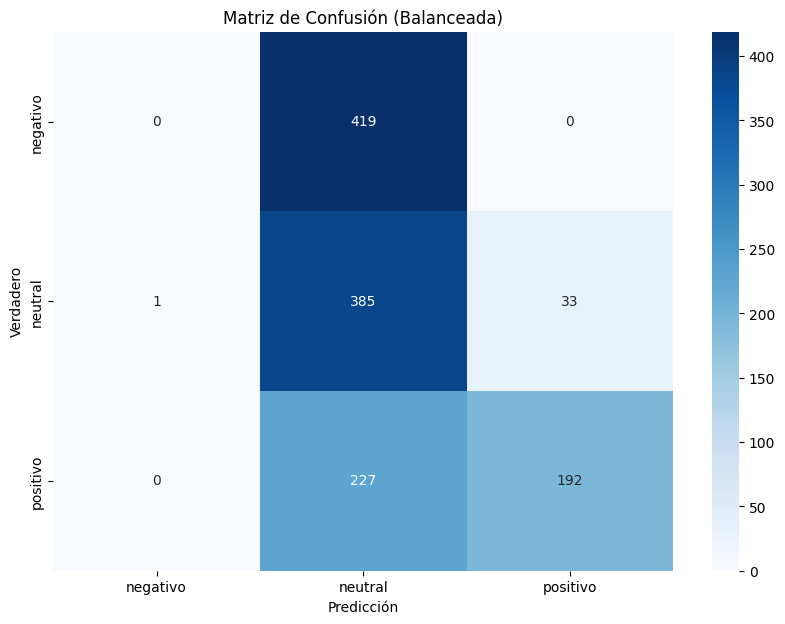

Reporte de Clasificación (Balanceado):
              precision    recall  f1-score   support

    negativo       0.00      0.00      0.00       419
     neutral       0.37      0.92      0.53       419
    positivo       0.85      0.46      0.60       419

    accuracy                           0.46      1257
   macro avg       0.41      0.46      0.38      1257
weighted avg       0.41      0.46      0.38      1257



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample

# Crear DataFrame a partir de X_test para combinar características léxicas
X_test_df = pd.DataFrame(X_test, columns=[f'token_{i}' for i in range(X_test.shape[1])])

# Añadir las características léxicas correspondientes
df_reindexed = df.reset_index(drop=True)
X_test_df['sentimiento_calculado'] = df_reindexed.loc[X_test_df.index % len(df_reindexed), 'sentimiento_calculado'].values

# Rebalancear el conjunto de prueba
df_test = X_test_df.copy()
df_test['sentimiento'] = np.argmax(y_test, axis=1)

# Crear DataFrames para cada clase
df_neg = df_test[df_test['sentimiento'] == 0]
df_neu = df_test[df_test['sentimiento'] == 1]
df_pos = df_test[df_test['sentimiento'] == 2]

# Submuestrear o sobremuestrear para balancear el conjunto de prueba
df_neg_upsampled = resample(df_neg, replace=True, n_samples=len(df_neu), random_state=42)
df_pos_upsampled = resample(df_pos, replace=True, n_samples=len(df_neu), random_state=42)

# Combinar DataFrames balanceados
df_balanced = pd.concat([df_neu, df_neg_upsampled, df_pos_upsampled])

# Separar características y etiquetas para el conjunto de prueba balanceado
X_test_balanced = df_balanced.drop('sentimiento', axis=1).drop('sentimiento_calculado', axis=1)
X_test_lexico_balanced = df_balanced['sentimiento_calculado'].values
y_test_balanced = df_balanced['sentimiento']

# Generar predicciones en el conjunto de prueba balanceado
y_pred_balanced = model.predict([X_test_balanced, X_test_lexico_balanced])
y_pred_classes_balanced = np.argmax(y_pred_balanced, axis=1)

# Crear matriz de confusión
cm_balanced = confusion_matrix(y_test_balanced, y_pred_classes_balanced)
print("Matriz de Confusión (Balanceada):")
print(cm_balanced)

# Visualizar la matriz de confusión balanceada
plt.figure(figsize=(10, 7))
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=['negativo', 'neutral', 'positivo'], yticklabels=['negativo', 'neutral', 'positivo'])
plt.title('Matriz de Confusión (Balanceada)')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Generar reporte de clasificación balanceada
report_balanced = classification_report(y_test_balanced, y_pred_classes_balanced, target_names=['negativo', 'neutral', 'positivo'])
print("Reporte de Clasificación (Balanceado):")
print(report_balanced)

# Seccion 4: Extraer sentimientos y Mostrar Resultados.

Primeras 5 entradas del lexicón de sentimientos:
    palabra  puntuacion
0     culpa          -2
1    culpar          -2
2    aborda           1
3    abordo           1
4  abandona          -2
Columnas en el DataFrame original:
Index(['username', 'timestamp', 'comment'], dtype='object')


Primeros 5 comentarios después de limpieza y tokenización:
[['eso', 'no', 'es', 'todo', 'al', 'realizarse', 'la', 'transferencia', 'del', 'paciente', 'herido', 'manta', 'los', 'funcionarios', 'del', 'hospital', 'de', 'pajan', 'debieron', 'trasladarse', 'con', 'el', 'herido', 'sin', 'la', 'respectiva', 'escolta', 'policial', 'obligatoria', 'en', 'estos', 'casos', 'si', 'eso', 'es', 'indignante', 'tambien', 'lo', 'es', 'el', 'silencio', 'de', 'salud', 'ec'], ['nunca', 'entregaste', 'un', 'hospital', 'para', 'la', 'zona', 'sur', 'de', 'manabi', 'jipijapa', 'pajan', 'pto', 'lopez', 'vote', 'ti', 'pero', 'eres', 'una', 'verguenza'], ['mas', 'de', 'adefesio', 'sinverguenza', 'charlatan', 'cuando', 'visito',

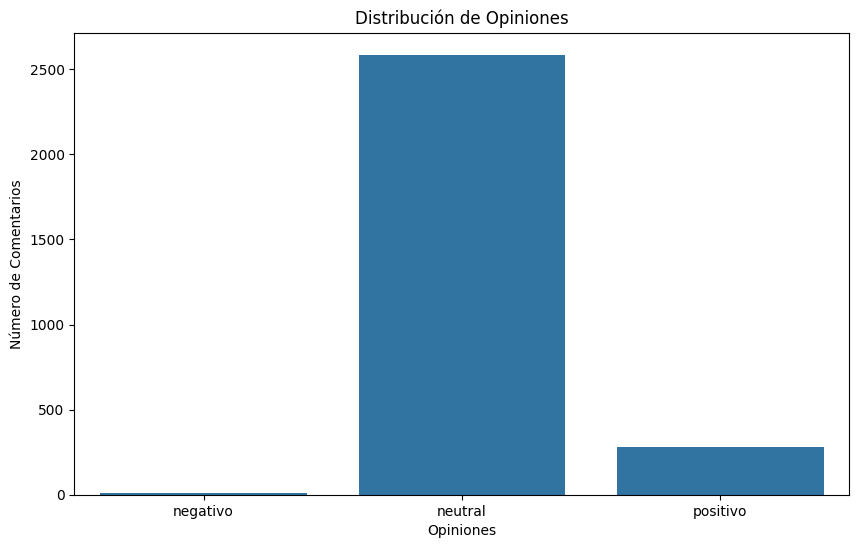

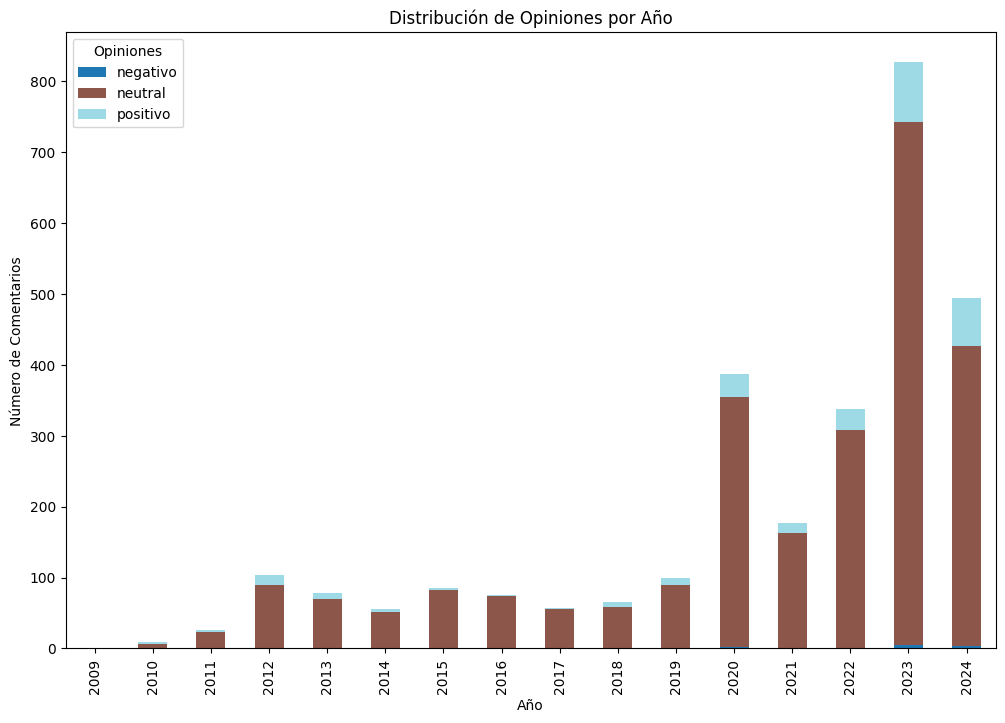

In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from collections import Counter

# Cargar el modelo entrenado
model = load_model('modelo_lstm_avanzado2.keras')

# Cargar el lexicón de sentimientos AFINN ajustado
lexicon_path = 'lexico_afinn.csv'
lexicon = pd.read_csv(lexicon_path, usecols=['palabra', 'puntuacion'])
lexicon_dict = dict(zip(lexicon['palabra'], lexicon['puntuacion']))

# Verificar la carga del lexicón
print("Primeras 5 entradas del lexicón de sentimientos:")
print(lexicon.head())

# Definir una función para limpiar y tokenizar el texto
def limpiar_tokenizar(texto):
    import re
    import string
    # Convertir todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[{}]'.format(re.escape(string.punctuation))
    nuevo_texto = re.sub(regex, ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split()
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    return nuevo_texto

# Definir una función para calcular el sentimiento léxico
def calcular_sentimiento(texto):
    tokens = limpiar_tokenizar(texto)
    sentimiento = sum([lexicon_dict.get(token, 0) for token in tokens])
    return sentimiento

# Cargar el tokenizador usado en el entrenamiento
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Preprocesar los comentarios
def preprocesar_comentarios(comentarios, tokenizer, max_len):
    comentarios_limpios = [limpiar_tokenizar(comentario) for comentario in comentarios]
    print("Primeros 5 comentarios después de limpieza y tokenización:")
    print(comentarios_limpios[:5])
    comentarios_texto = [' '.join(comentario) for comentario in comentarios_limpios]
    secuencias = tokenizer.texts_to_sequences(comentarios_texto)
    secuencias_padded = pad_sequences(secuencias, maxlen=max_len)
    sentimientos_calculados = [calcular_sentimiento(comentario) for comentario in comentarios_texto]
    return secuencias_padded, sentimientos_calculados

# Definir una función para predecir sentimientos
def predecir_sentimientos(comentarios, tokenizer, max_len, model):
    secuencias_padded, sentimientos_calculados = preprocesar_comentarios(comentarios, tokenizer, max_len)
    secuencias_padded_combined = np.hstack((secuencias_padded, np.array(sentimientos_calculados).reshape(-1, 1)))
    predicciones = model.predict([secuencias_padded_combined[:, :-1], secuencias_padded_combined[:, -1]])
    clases_predichas = np.argmax(predicciones, axis=1)
    # Mapeo de las clases a las tres emociones primordiales
    etiquetas = {0: 'negativo', 1: 'neutral', 2: 'positivo'}
    sentimientos_predichos = [etiquetas[clase] for clase in clases_predichas]
    return sentimientos_predichos

# Cargar los comentarios del CSV
csv_path = 'datasets/datos_combinados_1.csv'
df = pd.read_csv(csv_path)

# Verificar las columnas del DataFrame original
print("Columnas en el DataFrame original:")
print(df.columns)
print("\n")

# Predecir sentimientos de los comentarios
comentarios = df['comment'].tolist()
sentimientos_predichos = predecir_sentimientos(comentarios, tokenizer, max_len, model)

# Añadir los sentimientos predichos al DataFrame
df['sentimiento'] = sentimientos_predichos

# Mostrar distribución de opiniones en texto
conteo_sentimientos = df['sentimiento'].value_counts()
print("Distribución de Opiniones:")
print(conteo_sentimientos)
print("\n")

# Convertir la columna 'timestamp' a formato de fecha
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year

# Mostrar distribución de opiniones por año en texto
opiniones_por_ano = df.groupby(['year', 'sentimiento']).size().unstack().fillna(0)
print("Distribución de Opiniones por Año:")
print(opiniones_por_ano)
print("\n")

# Distribución de Opiniones
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentimiento', order=['negativo', 'neutral', 'positivo'])
plt.title('Distribución de Opiniones')
plt.xlabel('Opiniones')
plt.ylabel('Número de Comentarios')
plt.show()

# Distribución de Opiniones por Año
opiniones_por_ano.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribución de Opiniones por Año')
plt.xlabel('Año')
plt.ylabel('Número de Comentarios')
plt.legend(title='Opiniones')
plt.show()

# Sección 5: Visualización y Resultados

C:\Users\Erick Carreño\AppData\Local\Temp\ipykernel_28092\2986693860.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend(title='Sentimiento')


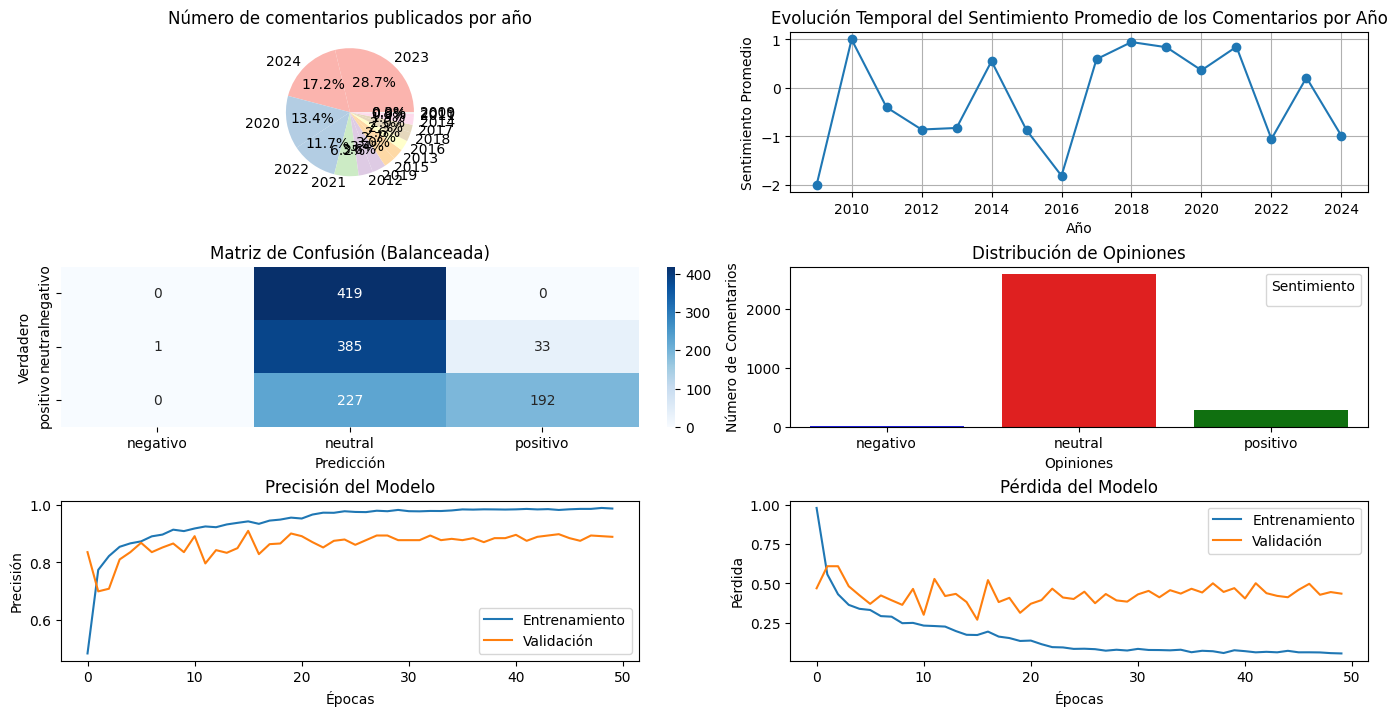

In [8]:
# Sección 5: Visualización y Resultados
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Asegúrate de tener la columna 'comment_length'
if 'comment_length' not in df.columns:
    df['comment_length'] = df['comment'].apply(lambda x: len(x.split()))

# Definir el objeto history con datos de entrenamiento del modelo
history = {
    'accuracy': [0.4831, 0.7738, 0.8219, 0.8542, 0.8662, 0.8731, 0.8906, 0.8967, 0.9138, 0.9088, 0.9180, 0.9250, 0.9224, 0.9320, 0.9375, 0.9427, 0.9341, 0.9454, 0.9489, 0.9557, 0.9526, 0.9664, 0.9729, 0.9725, 0.9779, 0.9755, 0.9749, 0.9797, 0.9780, 0.9825, 0.9781, 0.9776, 0.9789, 0.9787, 0.9807, 0.9843, 0.9836, 0.9846, 0.9843, 0.9838, 0.9845, 0.9860, 0.9843, 0.9853, 0.9824, 0.9847, 0.9861, 0.9861, 0.9894, 0.9873],
    'val_accuracy': [0.8356, 0.6991, 0.7083, 0.8102, 0.8356, 0.8681, 0.8356, 0.8519, 0.8657, 0.8356, 0.8912, 0.7963, 0.8426, 0.8333, 0.8495, 0.9097, 0.8287, 0.8634, 0.8657, 0.9005, 0.8912, 0.8704, 0.8519, 0.8750, 0.8796, 0.8611, 0.8773, 0.8935, 0.8935, 0.8773, 0.8773, 0.8773, 0.8935, 0.8773, 0.8819, 0.8773, 0.8843, 0.8704, 0.8843, 0.8843, 0.8958, 0.8750, 0.8889, 0.8935, 0.8981, 0.8843, 0.8750, 0.8935, 0.8912, 0.8889],
    'loss': [0.9824, 0.5583, 0.4308, 0.3631, 0.3377, 0.3303, 0.2911, 0.2875, 0.2459, 0.2478, 0.2305, 0.2277, 0.2242, 0.1955, 0.1717, 0.1703, 0.1921, 0.1602, 0.1509, 0.1323, 0.1348, 0.1117, 0.0929, 0.0910, 0.0816, 0.0827, 0.0798, 0.0702, 0.0762, 0.0712, 0.0817, 0.0747, 0.0742, 0.0724, 0.0763, 0.0603, 0.0695, 0.0666, 0.0552, 0.0729, 0.0671, 0.0596, 0.0629, 0.0597, 0.0693, 0.0597, 0.0598, 0.0590, 0.0545, 0.0525],
    'val_loss': [0.4689, 0.6100, 0.6099, 0.4820, 0.4243, 0.3694, 0.4233, 0.3924, 0.3631, 0.4650, 0.2997, 0.5288, 0.4194, 0.4332, 0.3812, 0.2681, 0.5212, 0.3809, 0.4079, 0.3122, 0.3700, 0.3936, 0.4666, 0.4100, 0.4006, 0.4472, 0.3737, 0.4323, 0.3914, 0.3837, 0.4299, 0.4524, 0.4113, 0.4568, 0.4350, 0.4659, 0.4421, 0.5007, 0.4456, 0.4698, 0.4040, 0.5013, 0.4377, 0.4204, 0.4117, 0.4592, 0.4976, 0.4275, 0.4448, 0.4347]
}

# Crear una figura y ejes para múltiples subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 18), constrained_layout=True)

# Convertir gráfico de barras a gráfico de pastel
df_yearly = df['year'].value_counts()
axs[0, 0].pie(df_yearly, labels=df_yearly.index, autopct='%1.1f%%', colors=plt.cm.Pastel1(np.linspace(0, 1, len(df_yearly))))
axs[0, 0].set_title('Número de comentarios publicados por año')

# Evolución temporal del sentimiento promedio por año
sentimientos_anuales = tweets_sentimientos.groupby('year')['puntuacion'].mean()
axs[0, 1].plot(sentimientos_anuales.index, sentimientos_anuales.values, marker='o', linestyle='-')
axs[0, 1].set_title('Evolución Temporal del Sentimiento Promedio de los Comentarios por Año')
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Sentimiento Promedio')
axs[0, 1].grid(True)

# Matriz de Confusión (Balanceada)
cm_balanced = confusion_matrix(y_test_balanced, y_pred_classes_balanced)
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=['negativo', 'neutral', 'positivo'], yticklabels=['negativo', 'neutral', 'positivo'], ax=axs[1, 0])
axs[1, 0].set_title('Matriz de Confusión (Balanceada)')
axs[1, 0].set_xlabel('Predicción')
axs[1, 0].set_ylabel('Verdadero')

# Distribución de Opiniones
sns.countplot(data=df, x='sentimiento', hue='sentimiento', order=['negativo', 'neutral', 'positivo'], ax=axs[1, 1], palette=['red', 'blue', 'green'])
axs[1, 1].set_title('Distribución de Opiniones')
axs[1, 1].set_xlabel('Opiniones')
axs[1, 1].set_ylabel('Número de Comentarios')
axs[1, 1].legend(title='Sentimiento')

# Gráficos del entrenamiento del modelo
axs[2, 0].plot(history['accuracy'], label='Entrenamiento')
axs[2, 0].plot(history['val_accuracy'], label='Validación')
axs[2, 0].set_title('Precisión del Modelo')
axs[2, 0].set_xlabel('Épocas')
axs[2, 0].set_ylabel('Precisión')
axs[2, 0].legend()

axs[2, 1].plot(history['loss'], label='Entrenamiento')
axs[2, 1].plot(history['val_loss'], label='Validación')
axs[2, 1].set_title('Pérdida del Modelo')
axs[2, 1].set_xlabel('Épocas')
axs[2, 1].set_ylabel('Pérdida')
axs[2, 1].legend()

# Mostrar la figura completa en una ventana emergente
def on_closing():
    root.quit()
    root.destroy()

root = tk.Tk()
root.title("Visualización de Resultados")
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Añadir un botón para cerrar la ventana
button = ttk.Button(root, text="Cerrar", command=on_closing)
button.pack(side=tk.BOTTOM)

# Asegurarse de que la ventana se cierra correctamente
root.protocol("WM_DELETE_WINDOW", on_closing)

# Iniciar el bucle de eventos de Tkinter
tk.mainloop()